# Diamond Price Prediction
The aim of this analysis is to predict the price of diamonds based on their characteristics. The dataset used for this analysis is the Diamonds dataset from Kaggle. The dataset contains 53940 observations and 10 variables. The variables are as follows:


| Column Name | Description |
|:--------|:--------|
|  carat |  Weight of the diamond  |
|  cut   | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
|  color   |  	Diamond colour, from J (worst) to D (best)   |
|  clarity   |  	How clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
|  x   |  Length in mm   |
|  y   |  	Width in mm   |
|  z   |  Depth in mm   |
|  depth   |  Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)   |
|  table   |  Width of top of diamond relative to widest point (43--95)   |
|  price   |  Price in US dollars (326--18,823)   |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Processing

In [3]:
df.shape

(50000, 10)

#check for null-values
df.info()

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
#values of each category
print(df.cut.value_counts(),'\n',df.color.value_counts(),'\n',df.clarity.value_counts())

cut
Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: count, dtype: int64 
 color
G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: count, dtype: int64 
 clarity
SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: count, dtype: int64


In [6]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Exploratory Data Analysis

<Axes: xlabel='price', ylabel='Count'>

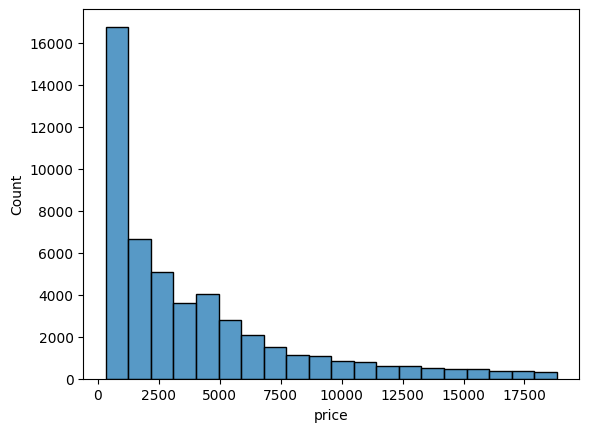

In [7]:
sns.histplot(df['price'],bins = 20)

<Axes: xlabel='carat', ylabel='Count'>

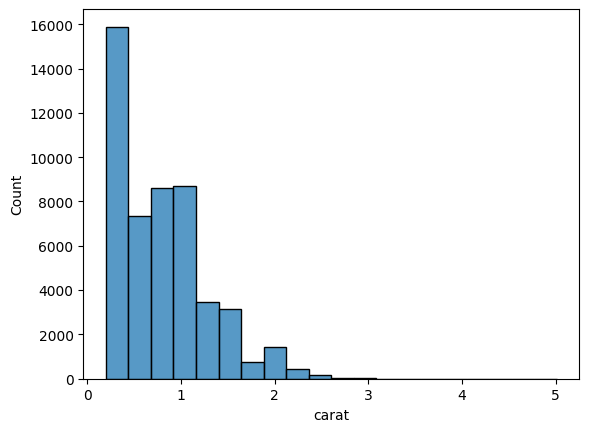

In [8]:
sns.histplot(df['carat'],bins=20)

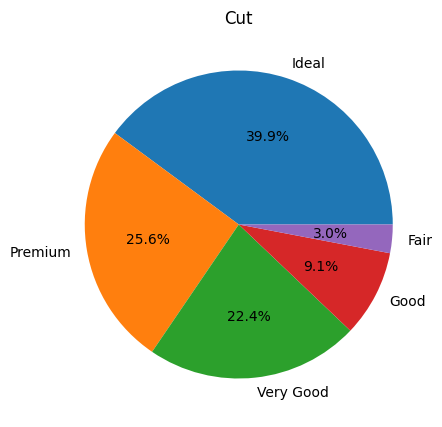

In [9]:
plt.figure(figsize=(5,5))
plt.pie(df['cut'].value_counts(),labels=['Ideal','Premium','Very Good','Good','Fair'],autopct='%1.1f%%')
plt.title('Cut')
plt.show()

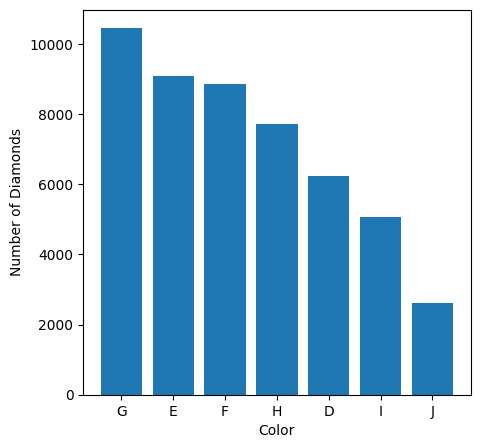

In [10]:
plt.figure(figsize=(5,5))
plt.bar(df['color'].value_counts().index,df['color'].value_counts())
plt.ylabel("Number of Diamonds")
plt.xlabel("Color")
plt.show()

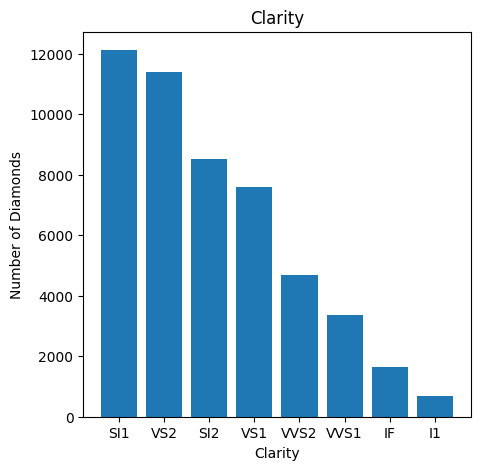

In [11]:
plt.figure(figsize=(5,5))
plt.bar(df['clarity'].value_counts().index,df['clarity'].value_counts())
plt.title('Clarity')
plt.ylabel("Number of Diamonds")
plt.xlabel("Clarity")
plt.show()

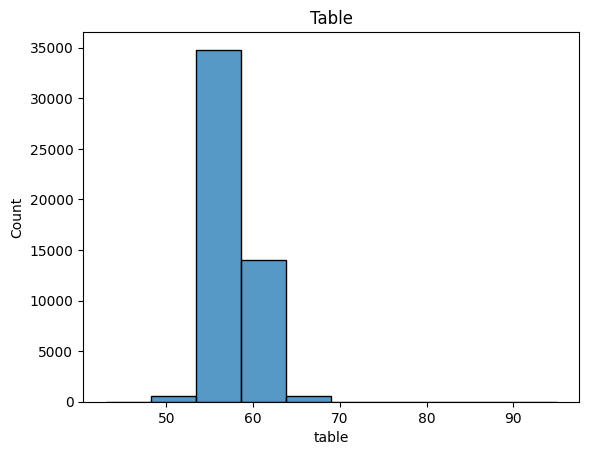

In [12]:
sns.histplot(df['table'],bins=10)
plt.title('Table')
plt.show()

## Comparing Diamond's Features with Price

<Axes: xlabel='cut', ylabel='price'>

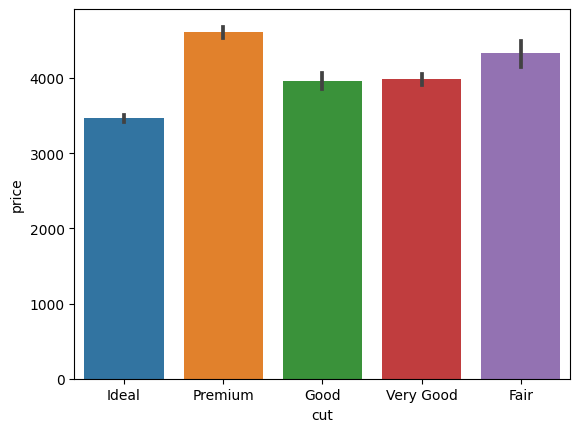

In [13]:
sns.barplot(x='cut',y='price',data=df)

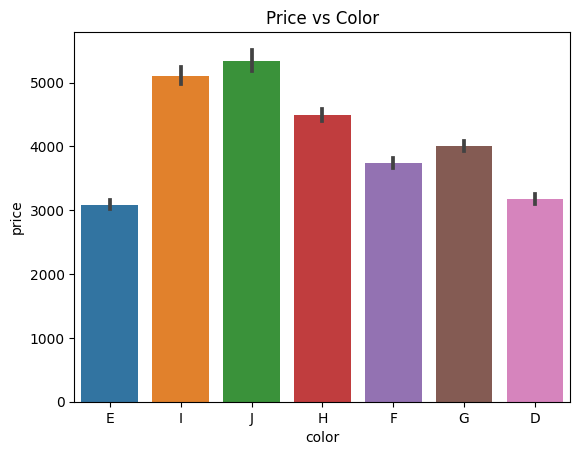

In [14]:
sns.barplot(x='color',y='price',data=df)
plt.title('Price vs Color')
plt.show()

<Axes: xlabel='clarity', ylabel='price'>

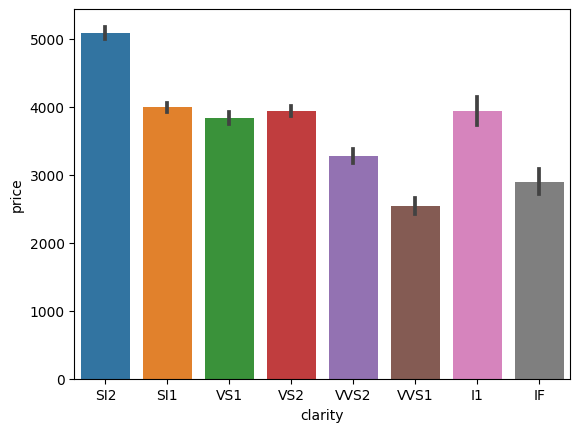

In [15]:
sns.barplot(x = 'clarity', y = 'price', data = df)

## Data Preprocessing 2

In [16]:
#change categorical variables to numerical variables
df['cut'] = df['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
df['color'] = df['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df['clarity'] = df['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

## Coorelation

In [17]:
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.135135,-0.291530,-0.352435,0.027734,0.183639,0.921804,0.975037,0.950035,0.952700
cut,-0.135135,1.000000,0.019548,0.189024,-0.223898,-0.432154,-0.053537,-0.125738,-0.121335,-0.149830
color,-0.291530,0.019548,1.000000,-0.026056,-0.047426,-0.027513,-0.172629,-0.270529,-0.263395,-0.268388
clarity,-0.352435,0.189024,-0.026056,1.000000,-0.067329,-0.159967,-0.146941,-0.371355,-0.357226,-0.366218
depth,0.027734,-0.223898,-0.047426,-0.067329,1.000000,-0.293012,-0.012731,-0.025563,-0.029809,0.094337
table,0.183639,-0.432154,-0.027513,-0.159967,-0.293012,1.000000,0.129848,0.197198,0.185248,0.153161
price,0.921804,-0.053537,-0.172629,-0.146941,-0.012731,0.129848,1.000000,0.884919,0.864393,0.860963
x,0.975037,-0.125738,-0.270529,-0.371355,-0.025563,0.197198,0.884919,1.000000,0.972977,0.970122
y,0.950035,-0.121335,-0.263395,-0.357226,-0.029809,0.185248,0.864393,0.972977,1.000000,0.950030
z,0.952700,-0.149830,-0.268388,-0.366218,0.094337,0.153161,0.860963,0.970122,0.950030,1.000000


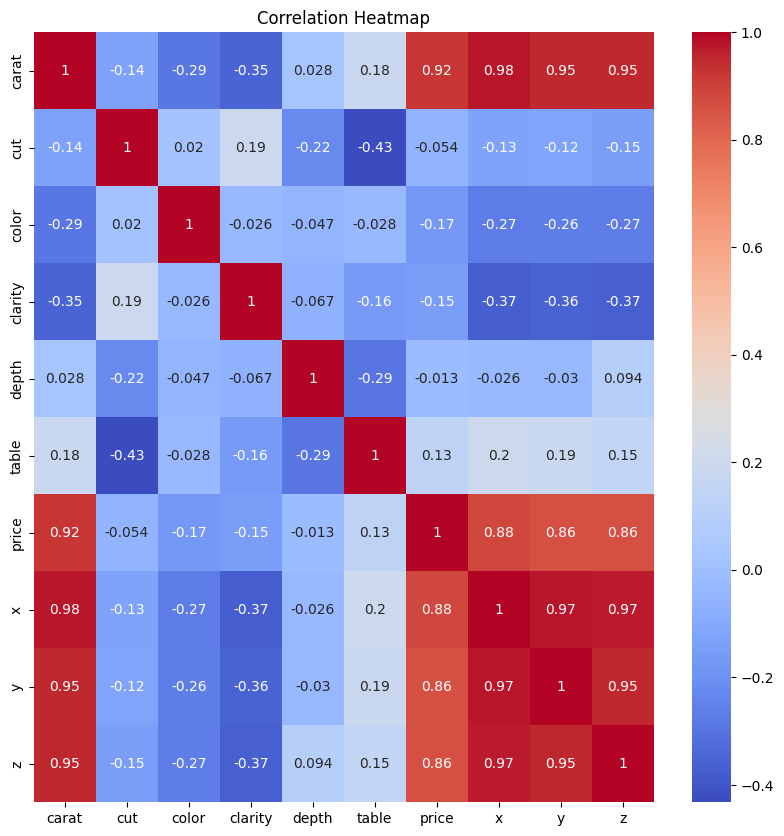

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            annot=True,
            cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Ploting the relationship between Price and Carat

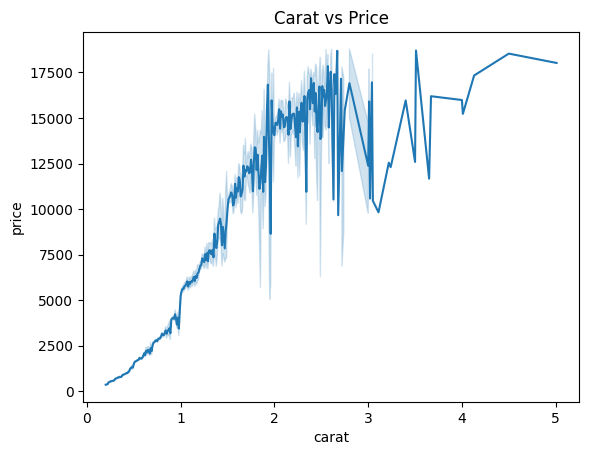

In [19]:
sns.lineplot(x='carat',y='price',data=df)
plt.title('Carat vs Price')
plt.show()

The price of the diamond increases as the carat of the diamond increases. Diamonds with less carat also have a high price due to other factors that affect the price.

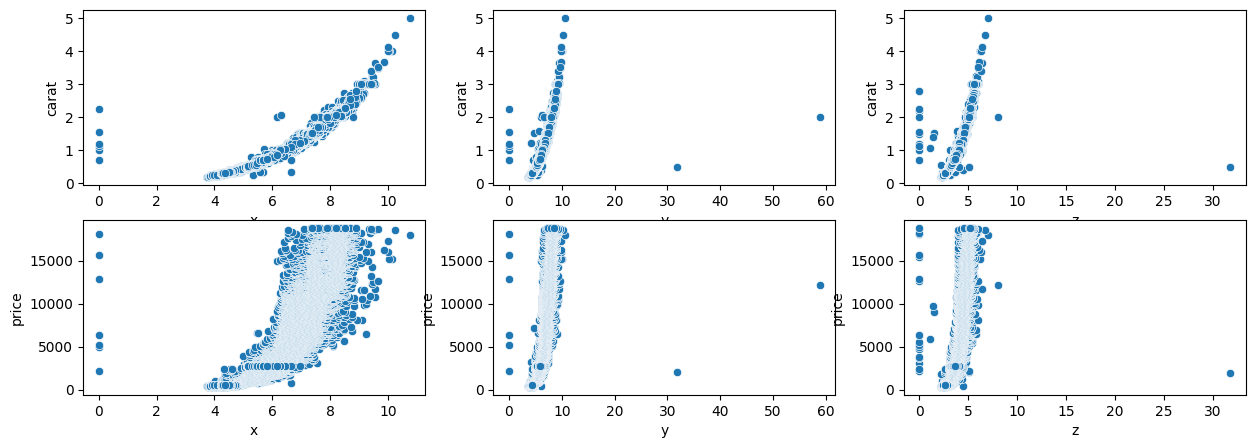

In [20]:
fig, ax = plt.subplots(2,3,figsize=(15,5))
sns.scatterplot(x='x',y='carat',data=df, ax=ax[0,0])
sns.scatterplot(x='y',y='carat',data=df, ax=ax[0,1])
sns.scatterplot(x='z',y='carat',data=df, ax=ax[0,2])
sns.scatterplot(x='x',y='price',data=df, ax=ax[1,0])
sns.scatterplot(x='y',y='price',data=df, ax=ax[1,1])
sns.scatterplot(x='z',y='price',data=df, ax=ax[1,2])
plt.show()

Most of the diamonds have x values between 4 and 8, y values between 4 and 10, and z values between 2 and 6. 

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(df.drop('price',axis=1),df['price'],test_size=0.2,random_state=42)

## Model Building

### Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [23]:
#training the model
dt.fit(x_train,y_train)
#train accuracy
dt.score(x_train,y_train)

0.9999995617234543

In [24]:
#predicting the test set
dt_pred = dt.predict(x_test)

### Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [26]:
#training the model
rf.fit(x_train,y_train)
#train accuracy
rf.score(x_train,y_train)

0.9971225073350879

In [27]:
#predicting the test set
rf_pred = rf.predict(x_test)

## Model Evaluation

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Decision Tree Regressor

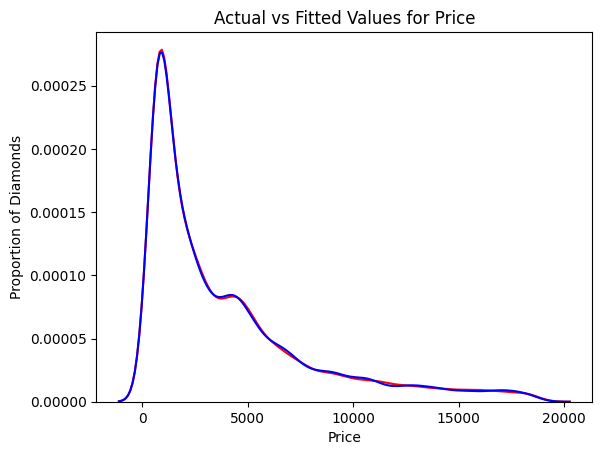

In [29]:
#distribution plot for actual and predicted values
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(dt_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [30]:
print('Decision Tree Regressor RMSE:',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('Decision Tree Regressor Accuracy:',dt.score(x_test,y_test))
print('Decision Tree Regressor MAE:',mean_absolute_error(y_test,dt_pred))

Decision Tree Regressor RMSE: 806.6541080057177
Decision Tree Regressor Accuracy: 0.9596192216680914
Decision Tree Regressor MAE: 409.92135


### Random Forest Regressor

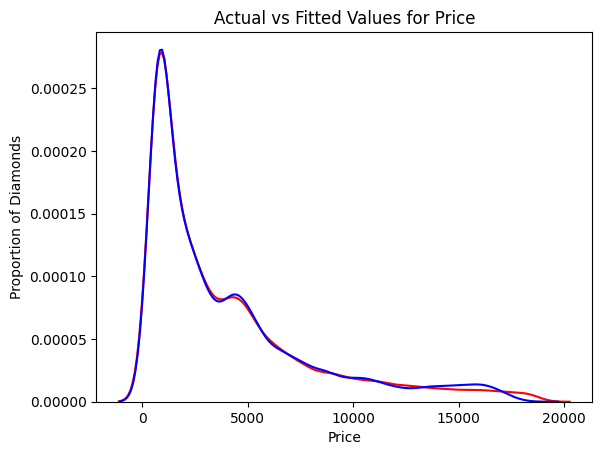

In [31]:
#distribution plot for actual and predicted values
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(rf_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [32]:
print('Random Forest Regressor RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Random Forest Regressor Accuracy:',rf.score(x_test,y_test))
print('Random Forest Regressor MAE:',mean_absolute_error(y_test,rf_pred))

Random Forest Regressor RMSE: 623.2648004952163
Random Forest Regressor Accuracy: 0.9758928879408933
Random Forest Regressor MAE: 306.8632572988095


## Conclusion

Both models are useful, but the Random Forest Regressor model is slightly more accurate, therefore would be a better model to use between the two. 

From the data shown above, as the carat of the diamond increases, the price of the diamond increases. It is also shown that J color and I1 clarity are the worst features for a diamond, but are higher in price than some of the other diamonds, which could be a result of other factors that affect the price of the diamond.